# Data Mining Movie Database Analysis

#### In this project, I will analyze the 'theMovieDataBase' dataset that I downloaded from kaggle and I will explain the progress of the project with comments during the process.I will apply the methods that I know and learned while working with this dataset.

In [2]:
#In this cell I am importing the packages that I am going to use

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
#Lets look at the first three rows of our dataset for understanding our dataset's rows and columns clearly
reader = pd.read_csv('tmdb-movies.csv') 
reader.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [4]:
#Now, lets see do we have null values in our database and if we have lets see the sum of null values for each attribute
reader.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [5]:
#In this cell I am replacing null values with 0
reader.fillna(0)
print()

## -Cleaning The Database;

In [6]:
#Now we need to clean our data.
#Firstly we are checking duplicated rows with 'duplicated()' function in pandas return the duplicate row as True and othter as False
#for counting the duplicate elements we sum all the rows
sum(reader.duplicated())

1

In [7]:
#After calculating the duplicated rows we can drop these rows using 'drop_duplicates()' function
reader.drop_duplicates(inplace = True)
#after removing duplicate value from the dataset
print("Afetr Removing Duplicate Values (Rows,Columns) : ",reader.shape)

Afetr Removing Duplicate Values (Rows,Columns) :  (10865, 21)


In [8]:
#Secondly we are changing format of release date into datetime format
#The dataset is given in the string format.
#So we need to change this in datetime format

reader['release_date'] = pd.to_datetime(reader['release_date'])
reader['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

In [9]:
#Lastly we can drop the colums which are not usable in the data analysis process.
#We don't need the columns like imdb_id, homepage,tagline, overview, budget_adj and revenue_adj.
reader.drop(['budget_adj','revenue_adj','overview','imdb_id','homepage','tagline'],axis =1,inplace = True)
print("Afetr Removing Unused Columns (Rows,Columns) : ",reader.shape)

Afetr Removing Unused Columns (Rows,Columns) :  (10865, 15)


## Now we can start our Data Analysis process;
### 1)First thing I wonder is which year has the highest release of movies?

release_year
2011    540
2012    588
2013    659
2014    700
2015    629
Name: id, dtype: int64


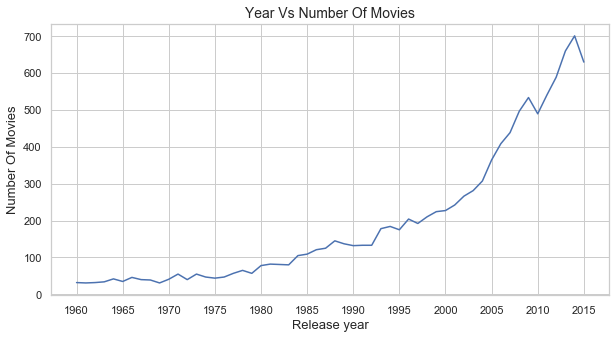

In [11]:
#we make group for each year and count the number of movies in each year 
data=reader.groupby('release_year').count()['id']
print(data.tail())

#And make group of the data according to their release year and count the total number of movies in each year and pot.
reader.groupby('release_year').count()['id'].plot(xticks = np.arange(1960,2016,5))

#set the figure size and labels
sns.set(rc={'figure.figsize':(10,5)})
plt.title("Year Vs Number Of Movies",fontsize = 14)
plt.xlabel('Release year',fontsize = 13)
plt.ylabel('Number Of Movies',fontsize = 13)
#set the style sheet
sns.set_style("whitegrid")

> **After Seeing the plot and the output we can conclude that year 2014 year has the highest release of movies (700) followed by year 2013 (659) and year 2015 (629).**

## 2)Now lets see which movie has the highest or lowest profit?


In [12]:
#Firstly we need to calcule profit for each of the movie
#adding a new column to the dataset named as 'Profit'
reader['Profit'] = reader['revenue'] - reader['budget']


In [13]:
#using the function 'idmin' to find the index of lowest profit movie.
#using the function 'idmax' to find the index of Highest profit movie.
#print the row related to this index.
def find_minmax(x):
    #use the function 'idmin' to find the index of lowest profit movie.
    min_index = reader[x].idxmin()
    #use the function 'idmax' to find the index of Highest profit movie.
    high_index = reader[x].idxmax()
    high = pd.DataFrame(reader.loc[high_index,:])
    low = pd.DataFrame(reader.loc[min_index,:])
    
    #print the movie with high and low profit
    print("Movie Which Has Highest "+ x + " : ",reader['original_title'][high_index])
    print("Movie Which Has Lowest "+ x + "  : ",reader['original_title'][min_index])
    return pd.concat([high,low],axis = 1)

#calling the find_minmax function that we write.
find_minmax('Profit')

Movie Which Has Highest Profit :  Avatar
Movie Which Has Lowest Profit  :  The Warrior's Way


,1386,2244
id,19995,46528
popularity,9.43277,0.25054
budget,237000000,425000000
revenue,2781505847,11087569
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
keywords,culture clash|future|space war|space colony|so...,assassin|small town|revenge|deception|super speed
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller


> The first column shows the highest profit made by a movie and second column shows the highest in loss movie in this dataset.

>As we can see that 'Avatar' movie Directed by James Cameron earn the highest profit in all, making over 2.5B in profit in this dataset.And the most in loss movie in this dataset is The Warrior's Way. Going in loss by more than 400M was directed by Singmoo Lee.


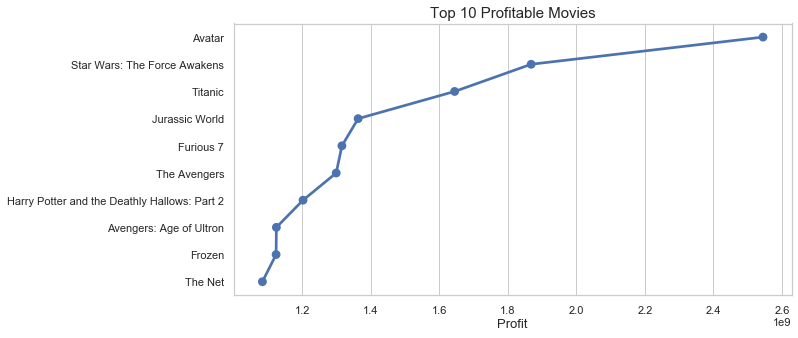

In [14]:
#Making a graph which contain top 10 movies which earn highest profit.
#sort the 'Profit' column in decending order and store it in the new dataframe,
info = pd.DataFrame(reader['Profit'].sort_values(ascending = False))
info['original_title'] = reader['original_title']
data = list(map(str,(info['original_title'])))
x = list(data[:10])
y = list(info['Profit'][:10])

#make a graph using pointplot for top 10 profitable movies.
ax = sns.pointplot(x=y,y=x)

#setup the figure size
sns.set(rc={'figure.figsize':(10,5)})
#setup the title and labels of the plot.
ax.set_title("Top 10 Profitable Movies",fontsize = 15)
ax.set_xlabel("Profit",fontsize = 13)
sns.set_style("darkgrid")

##  3)Now lets see movie with highest and lowest budget?

In [15]:
#find the movie with highest and lowest budget.
#use 'find_minmax' function which i made earlier.
#make sure that movie with budget zero didn't affect the result.
#so change the zero into NAN in budget column.
reader['budget'] = reader['budget'].replace(0,np.NAN)
find_minmax('budget')

Movie Which Has Highest budget :  The Warrior's Way
Movie Which Has Lowest budget  :  Fear Clinic


,2244,1151
id,46528,287524
popularity,0.25054,0.177102
budget,4.25e+08,1
revenue,11087569,0
original_title,The Warrior's Way,Fear Clinic
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Thomas Dekker|Robert Englund|Cleopatra Coleman...
director,Sngmoo Lee,Robert Hall
keywords,assassin|small town|revenge|deception|super speed,phobia|doctor|fear
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Horror


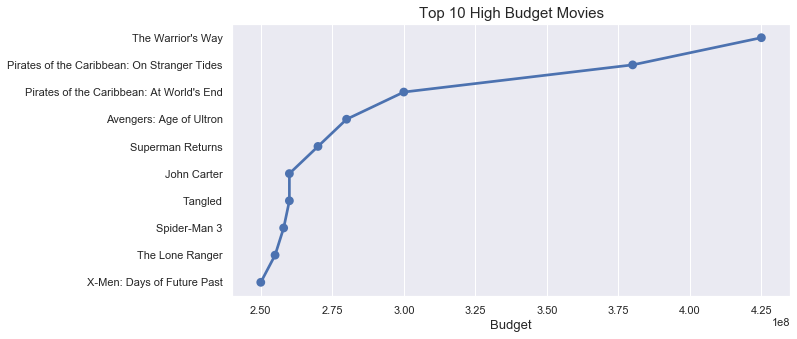

In [16]:
#make a plot which contain top 10 highest budget movies.
#sort the 'budget' column in decending order and store it in the new dataframe.
info = pd.DataFrame(reader['budget'].sort_values(ascending = False))
info['original_title'] = reader['original_title']
data = list(map(str,(info['original_title'])))

#extract the top 10 budget movies data from the list and dataframe.
x = list(data[:10])
y = list(info['budget'][:10])

#plot the figure and setup the title and labels.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 High Budget Movies",fontsize = 15)
ax.set_xlabel("Budget",fontsize = 13)
sns.set_style("darkgrid")

## 4)Lets check which year has the highest profit rate?

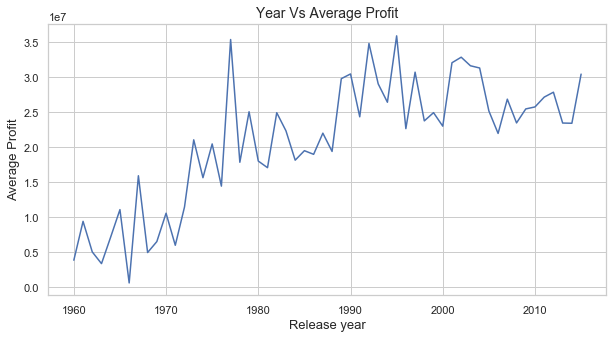

In [18]:
#do year-wise analysis of profit earn by movies in each earn.
#take the average of profit made by movies in each year and plot.
#make the group of the data according to their release_year and find the mean profit and plot.
reader.groupby('release_year')['Profit'].mean().plot()

#setup the title and labels of the figure.
plt.title("Year Vs Average Profit",fontsize = 14)
plt.xlabel('Release year',fontsize = 13)
plt.ylabel('Average Profit',fontsize = 13)

#setup the figure size.
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("whitegrid")

> According to the graph, year 2002-03 the most profitable years And the profit was very low between the years 1960 and 1970.

## 5)Lets see which length movies most liked by the audiences according to their popularity?

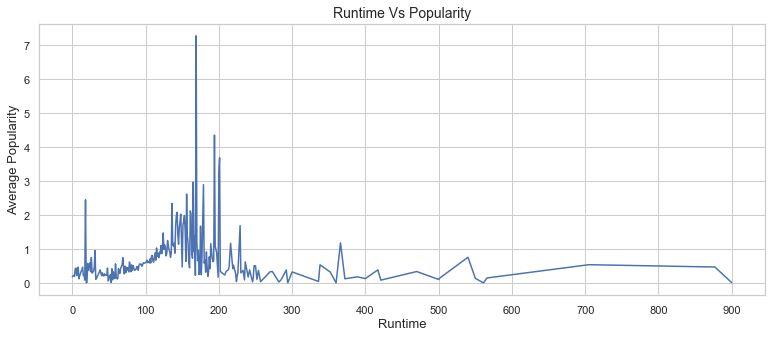

In [19]:
#use groupby function and group the data according to their runtime.
#make a graph using their popularity and find which length movies are most popular.

#make the group of the data according to their runtime and find the mean popularity related to this and plot.
reader.groupby('runtime')['popularity'].mean().plot(figsize = (13,5),xticks=np.arange(0,1000,100))

#setup the title of the figure
plt.title("Runtime Vs Popularity",fontsize = 14)

#setup the x-label and y-label of the plot.
plt.xlabel('Runtime',fontsize = 13)
plt.ylabel('Average Popularity',fontsize = 13)

#setup the figure size.
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("whitegrid")

> According to the graph we can say that movies in the range of 100-200 runtime are more popular than other runtime movies. Because it is boring to see the long duration movies.

## 6)Lets see the average runtime of movies from year to year?

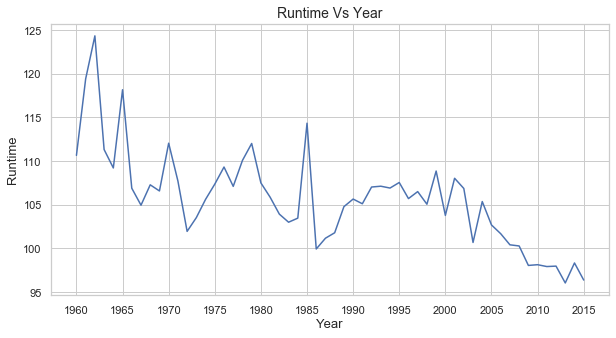

In [20]:

#make the group of the data according to their release_year and find the mean  related to this and plot.
reader.groupby('release_year').mean()['runtime'].plot(xticks = np.arange(1960,2016,5))

#setup the figure size.
sns.set(rc={'figure.figsize':(10,5)})

#setup the title of the figure
plt.title("Runtime Vs Year",fontsize = 14)

#setup the x-label and y-label of the plot.
plt.xlabel('Year',fontsize = 13)
plt.ylabel('Runtime',fontsize = 13)
sns.set_style("whitegrid")


> According to the graph movie duration is decreasing year to year and it's interesting actually. But we are learing that people don't want to watch the long duration movies. So that the average runtime duraion of the movies are arround 100 Minutes. 

## 7)Which month released highest number of movies in all of the years? And which month made the highest average revenue?

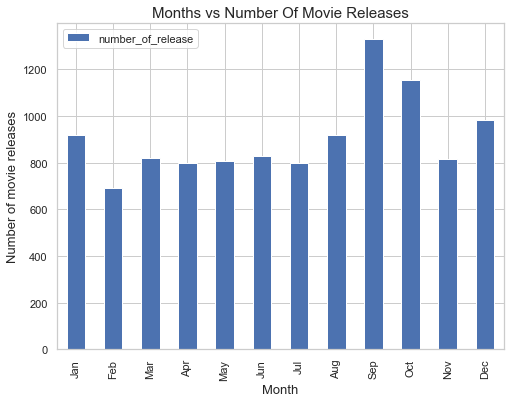

In [21]:
#extract the month number from the release date.
month_release = reader['release_date'].dt.month

#count the movies in each month using value_counts().
number_of_release = month_release.value_counts().sort_index()
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
number_of_release = pd.DataFrame(number_of_release)
number_of_release['month'] = months

#change the column name of the new dataframe 'number_of_release'
number_of_release.rename(columns = {'release_date':'number_of_release'},inplace=True)

#plot the bar graph using plot.
number_of_release.plot(x='month',kind='bar',fontsize = 11,figsize=(8,6))

#set the labels and titles of the plot.
plt.title('Months vs Number Of Movie Releases',fontsize = 15)
plt.xlabel('Month',fontsize = 13)
plt.ylabel('Number of movie releases',fontsize = 13)
sns.set_style("darkgrid")

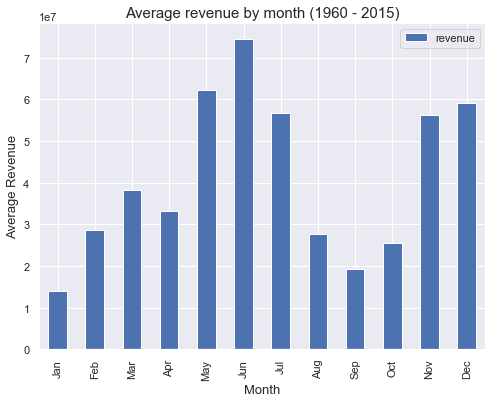

In [22]:
#which month made the highest average revenue?.
#make a dataframe with in which store the release month of each movie.
month_release = pd.DataFrame(month_release)

#change the column name of the new dataframe 'month_release'.
month_release.rename(columns = {'release_date':'release_month'},inplace=True)

#add a new column 'revenue' in the dataframe 'month_release'.
month_release['revenue'] = reader['revenue']

#make the group of the data according to their month and calculate the mean revenue of each month.
mean_revenue  = month_release.groupby('release_month').mean()
mean_revenue['month'] = months

#make the bar plot using pandas plot function.
mean_revenue.plot(x='month',kind='bar',figsize = (8,6),fontsize=11)

#setup the title and lables of the plot.
plt.title('Average revenue by month (1960 - 2015)',fontsize = 15)
plt.xlabel('Month',fontsize = 13)
plt.ylabel('Average Revenue',fontsize = 13)
sns.set_style("darkgrid")

>According tp the graph we can say that movie which release in may or june month made the high revenue in comparison of other month release. Or it can be happened because of outliers.

## 8)Which Genre Has The Highest Release Of Movies?

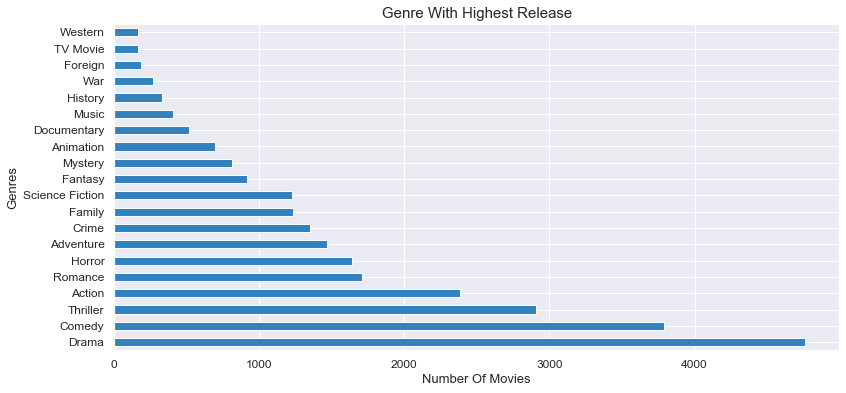

In [23]:
#make a function will will split the string and return the count of each genre.
def count_genre(x):
    #concatenate all the rows of the genrs.
    data_plot = reader[x].str.cat(sep = '|')
    data = pd.Series(data_plot.split('|'))
    #conts each of the genre and return.
    info = data.value_counts(ascending=False)
    return info

#call the function for counting the movies of each genre.
total_genre_movies = count_genre('genres')
#plot a 'barh' plot using plot function for 'genre vs number of movies'.
total_genre_movies.plot(kind= 'barh',figsize = (13,6),fontsize=12,colormap='tab20c')

#setup the title and the labels of the plot.
plt.title("Genre With Highest Release",fontsize=15)
plt.xlabel('Number Of Movies',fontsize=13)
plt.ylabel("Genres",fontsize= 13)
sns.set_style("whitegrid")

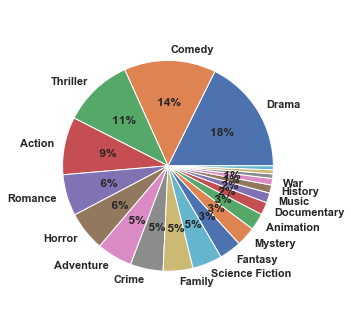

In [24]:
i = 0
genre_count = []
for genre in total_genre_movies.index:
    genre_count.append([genre, total_genre_movies[i]])
    i = i+1
    
plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(5, 5))
genre_count.sort(key = lambda x:x[1], reverse = True)
labels, sizes = zip(*genre_count)
labels_selected = [n if v > sum(sizes) * 0.01 else '' for n, v in genre_count]
ax.pie(sizes, labels=labels_selected,
       autopct = lambda x:'{:2.0f}%'.format(x) if x > 1 else '',
       shadow=False, startangle=0)
ax.axis('equal')
plt.tight_layout()

## 9)Which genres are most popular from year to year?

In [25]:
#map all the rows of genres in a list.
genre_details = list(map(str,(reader['genres'])))
genre = ['Adventure', 'Science Fiction', 'Fantasy', 'Crime', 'Western', 'Family','nan', 'Animation','War','Mystery','Romance','TV Movie','Action', 'Thriller','Comedy','Drama' , 'History', 'Music', 'Horror', 'Documentary', 'Foreign']

#make the numpy array of year and popularity which contain all the rows of release_year and popularity column. 
year = np.array(reader['release_year'])
popularity = np.array(reader['popularity'])

#make a null dataframe which indexs are genres and columns are years.
popularity_df = pd.DataFrame(index = genre, columns = range(1960, 2016))
#change all the values of the dataframe from NAN to zero.
popularity_df = popularity_df.fillna(value = 0.0)

z = 0
for i in genre_details:
    split_genre = list(map(str,i.split('|')))
    popularity_df.loc[split_genre, year[z]] = popularity_df.loc[split_genre, year[z]] + popularity[z]
    z+=1

In [26]:
#calculate the standard deviation for the accurate results.
def calculate_std(x):
    return (x-x.mean())/x.std(ddof=0)

popular_genre = calculate_std(popularity_df)
popular_genre.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Adventure,0.753047,1.338265,1.996432,1.398764,0.550490,1.124313,0.951448,1.817532,1.534066,1.097634,...,0.608896,0.520337,0.755137,0.977663,1.034638,0.586530,0.732253,0.755530,1.174435,1.614759
Science Fiction,-0.467064,-0.361952,-0.640003,-0.646572,-0.667888,-0.869288,0.097082,-0.634089,1.452081,-0.710447,...,-0.285369,-0.305635,0.082456,0.679288,-0.104266,0.212188,0.189865,0.575138,0.902119,1.231957
Fantasy,-0.528631,-0.744050,-0.691929,-0.895883,-0.012691,-0.992961,-0.585750,-0.706100,-0.055098,-0.771756,...,0.064256,0.322410,0.008741,0.178378,0.153510,0.028812,0.081027,-0.182739,-0.108344,-0.320493
Crime,-0.607773,-0.111525,-0.192078,-0.020849,0.082887,-0.523188,-0.034184,0.517043,0.209143,0.593035,...,0.085715,0.302191,0.298300,-0.395319,-0.171136,-0.059809,0.092316,0.347388,-0.219402,0.027262
Western,0.705451,-0.588007,-0.266409,-0.863575,-1.009777,-0.527569,-0.028313,-0.775331,-0.824684,0.996730,...,-1.032584,-1.024569,-1.058297,-1.111565,-0.974311,-0.992158,-0.868553,-0.974491,-0.925887,-0.759302


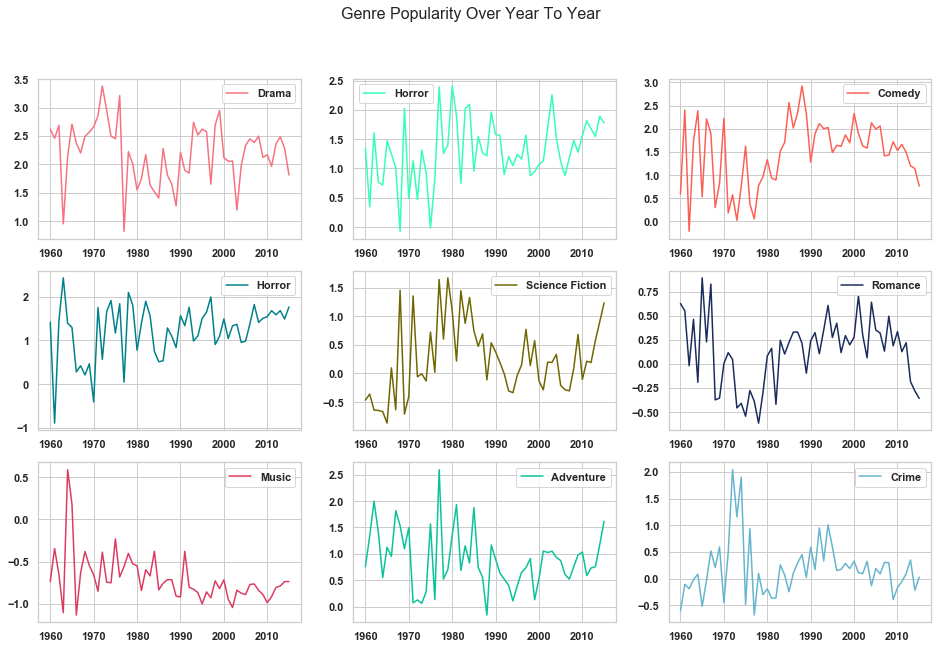

In [27]:
#How the popularity of the genre differ year by year.
sns.set_style("whitegrid")
#make a subplot of size 3,3.
fig, ax = plt.subplots(3,3,figsize = (16,10))

#set the title of the subplot.
fig.suptitle('Genre Popularity Over Year To Year',fontsize = 16)

#graph of popular genres
popular_genre.loc['Drama'].plot(label = "Drama",color = '#f67280',ax = ax[0][0],legend=True)
popular_genre.loc['Action'].plot(label = "Horror",color='#33FFB5',ax = ax[0][1],legend=True)
popular_genre.loc['Comedy'].plot(label = "Comedy",color='#fe5f55',ax = ax[0][2],legend=True)
popular_genre.loc['Thriller'].plot(label = "Horror",color='#00818a',ax = ax[1][0],legend=True)
popular_genre.loc['Science Fiction'].plot(label = "Science Fiction",color='#6f6600',ax = ax[1][1],legend=True)
popular_genre.loc['Romance'].plot(label = "Romance",color='#1a2c5b',ax = ax[1][2],legend=True)
popular_genre.loc['Music'].plot(label = "Music",color='#db3b61',ax = ax[2][0],legend=True)
popular_genre.loc['Adventure'].plot(label = "Adventure",color='#08c299',ax = ax[2][1],legend=True)
popular_genre.loc['Crime'].plot(label = "Crime",color='c',ax = ax[2][2],legend=True)

# Conclusions as result of our analysis
>   Drama is the most popular genre, following by action, comedy and thriller.

>    Drame, Comedy, Thriller and Action are four most-made genres.

>    Maximum Number Of Movies Release In year 2014.

>    'Avatar' is the most profitable movie.
    
>    Short or Long duration movies are more popular than long duration movies.
    
>    Average runtime of the movies are decreasing year by year.
    
>    May,june,november and december are most popular month for releasing movies, if you want to earn more profit.
    
>    Horror and Science Fiction getting popular lately.